# Assignment 17

## Data Cleaning/Processing

In [7]:
library(readxl)
library(MB14)
library(caret)
library(ranger)
library(ggplot2)
library(VGAM)
a17 <- read_excel("~/Fall Semester 2018/Statistical Analysis with R/Assignments/Assignment 17/c2015.xlsx")

In [8]:
a17$AGE = as.numeric(a17$AGE)
a17$ST_CASE = NULL
a17$YEAR = NULL
a17$TRAV_SP = NULL
a17$HARM_EV = NULL
a17 = a17[a17$HOUR != 99,]
a17 = a17[a17$SEX != "Unknown",]
a17 = a17[a17$SEX != "Not Rep",]
a17 = a17[a17$MOD_YEAR != "Unknown",]
a17 = a17[a17$MOD_YEAR != "Not Rep",]
a17 = a17[a17$DEFORMED != "Unknown",]
a17 = a17[a17$DEFORMED != "Not Reported",]
a17 = a17[a17$INJ_SEV != "Unknown",]
a17 = a17[a17$MAN_COLL != "Unknown",]
a17 = a17[a17$OWNER != "Unknown",]
a17 = a17[a17$ROUTE != "Unknown",]
a17 = a17[a17$LGT_COND != "Unknown",]
a17 = a17[a17$LGT_COND != "Not Reported",]
a17 = a17[a17$WEATHER != "Unkno",]
a17 = a17[a17$WEATHER != "Not R",]
a17$MOD_YEAR = as.numeric(a17$MOD_YEAR)
a17 = QuickClean(a17, 1)
sum(is.na(a17))
levels(a17$INJ_SEV) = c("D", "D", "A", "A", "A", "A", "D", "A")
levels(a17$STATE) = c("E", "W", "W", "C", "W", "W", "E", "E", "E", "E", "E", "W", "W", "C", "C", "C", "C", "C", "C", "E", "E", "E", "C", "C", "C", "C", "W", "C", "W", "E", "E", "W", "E", "E", "C", "C", "C", "W", "E", "E", "E", "C", "C", "C", "W", "E", "E", "W", "E", "C", "W")
levels(a17$MONTH) = c(4,8,12,2,1,7,6,3,5,11,10,9)
a17$MONTH = as.numeric(a17$MONTH)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] 0

## Preliminary Data Visualization

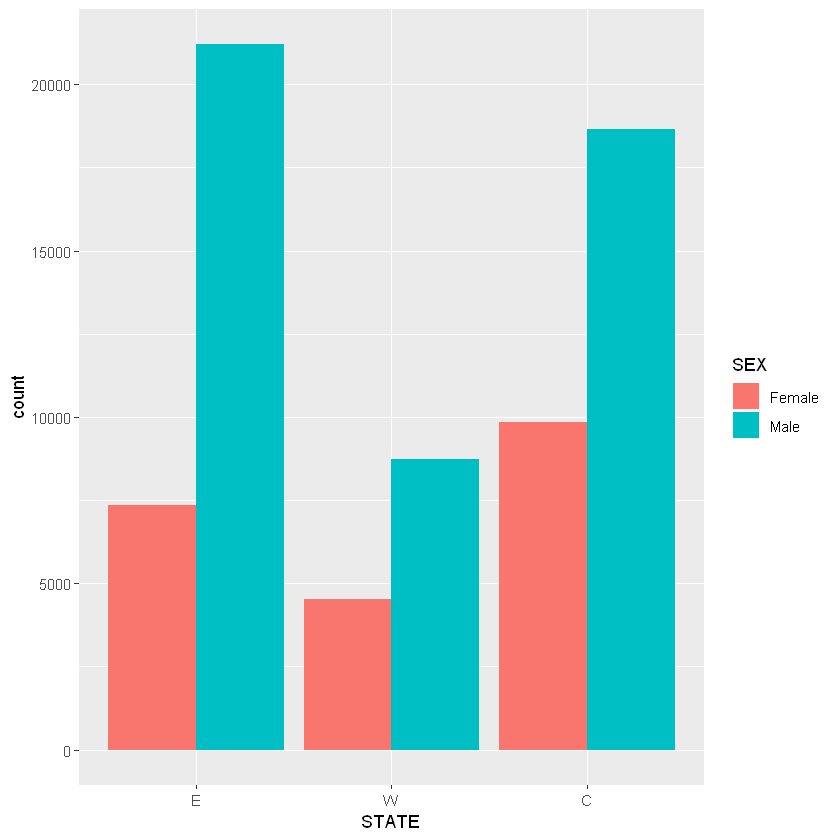

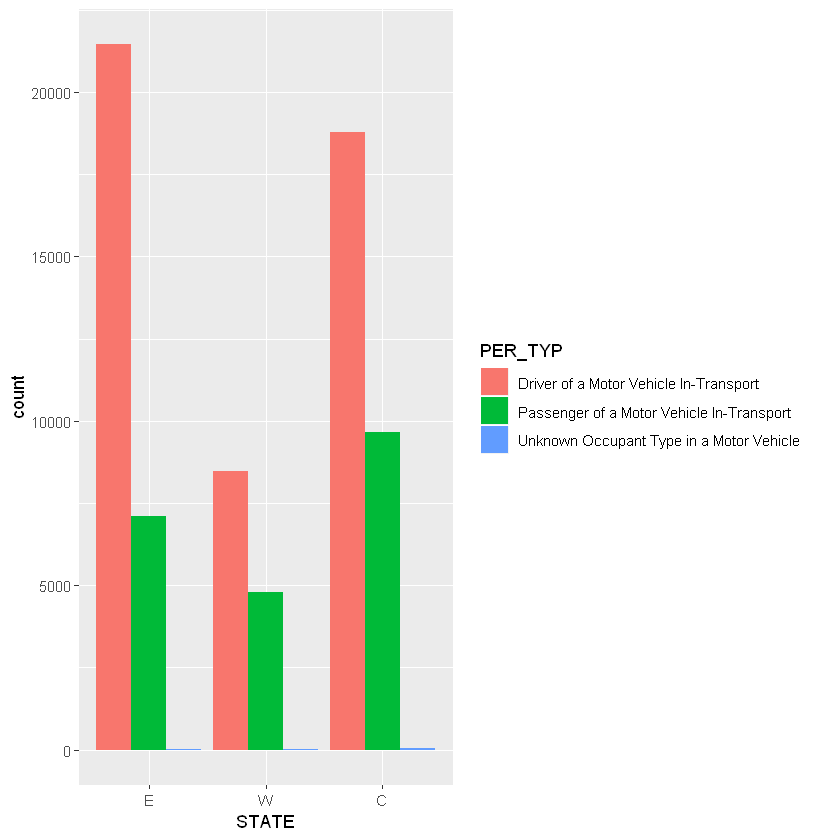

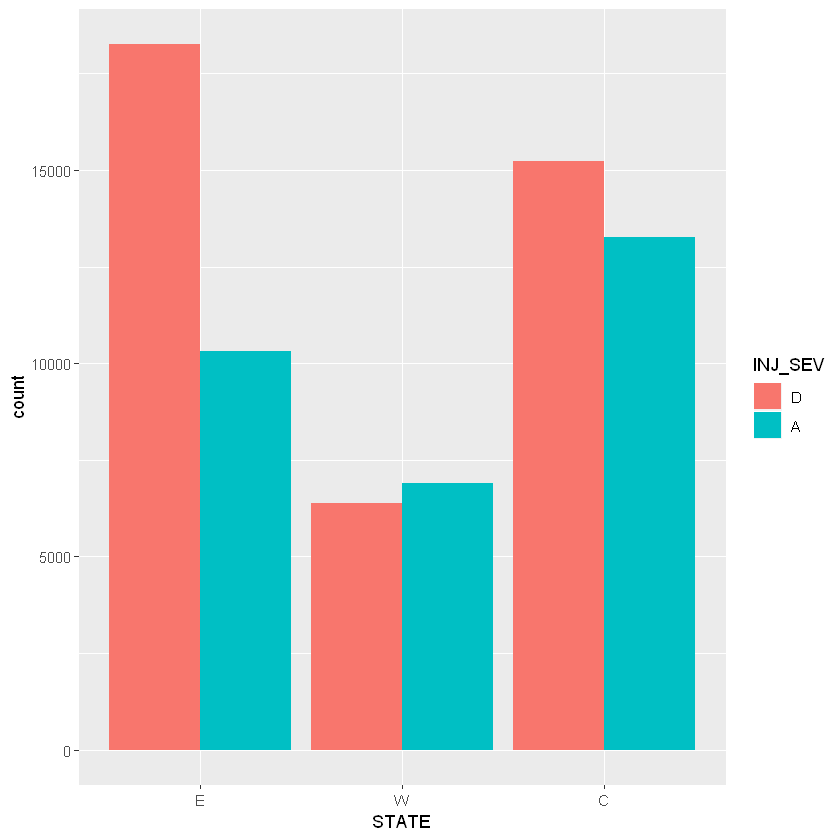

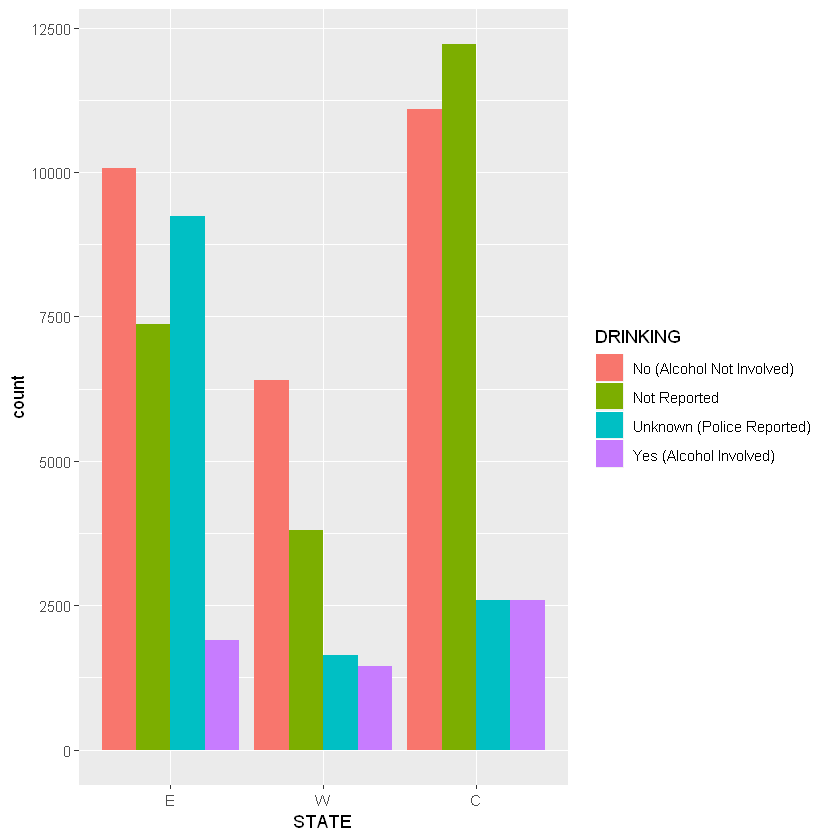

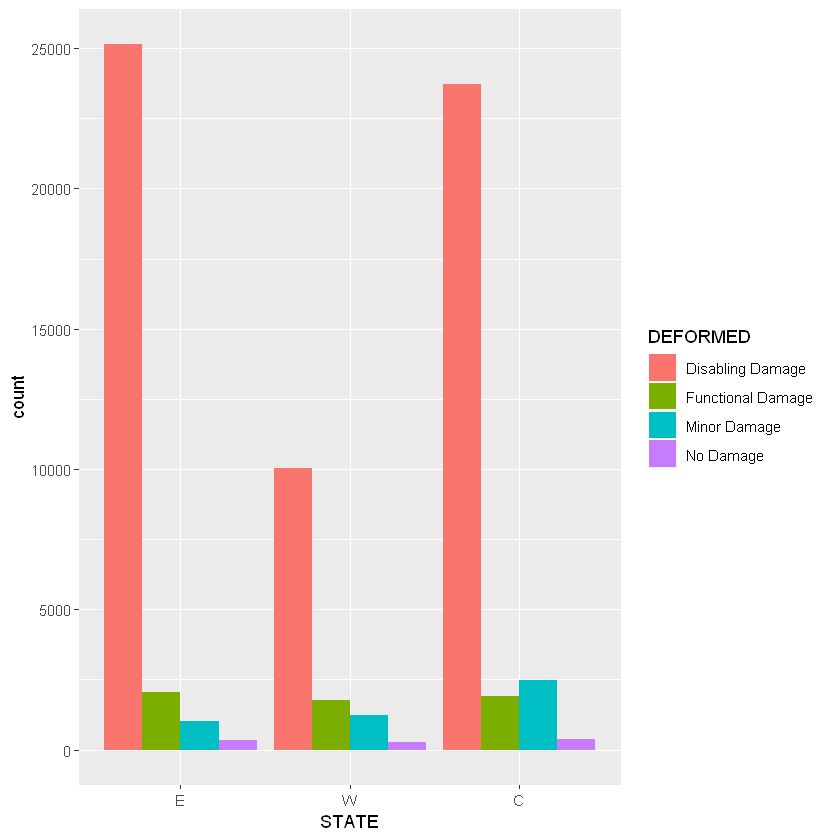

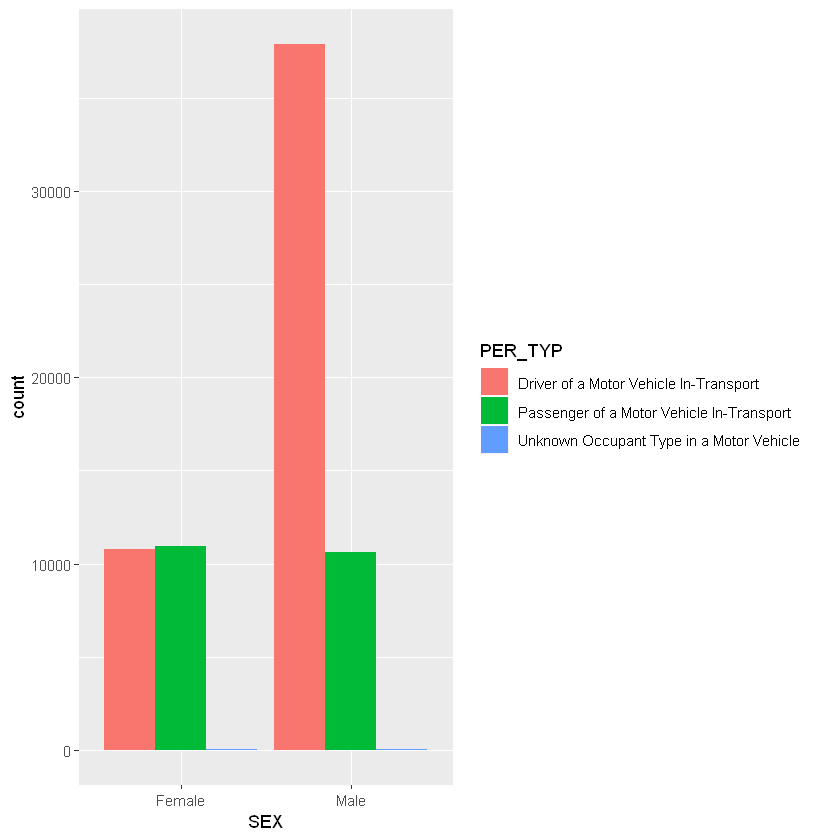

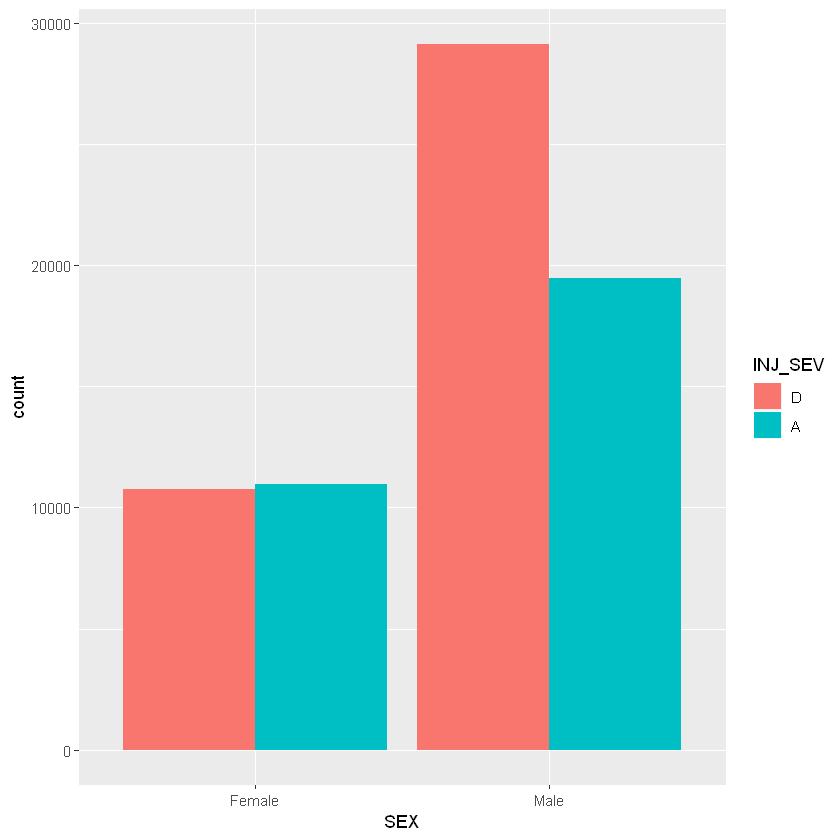

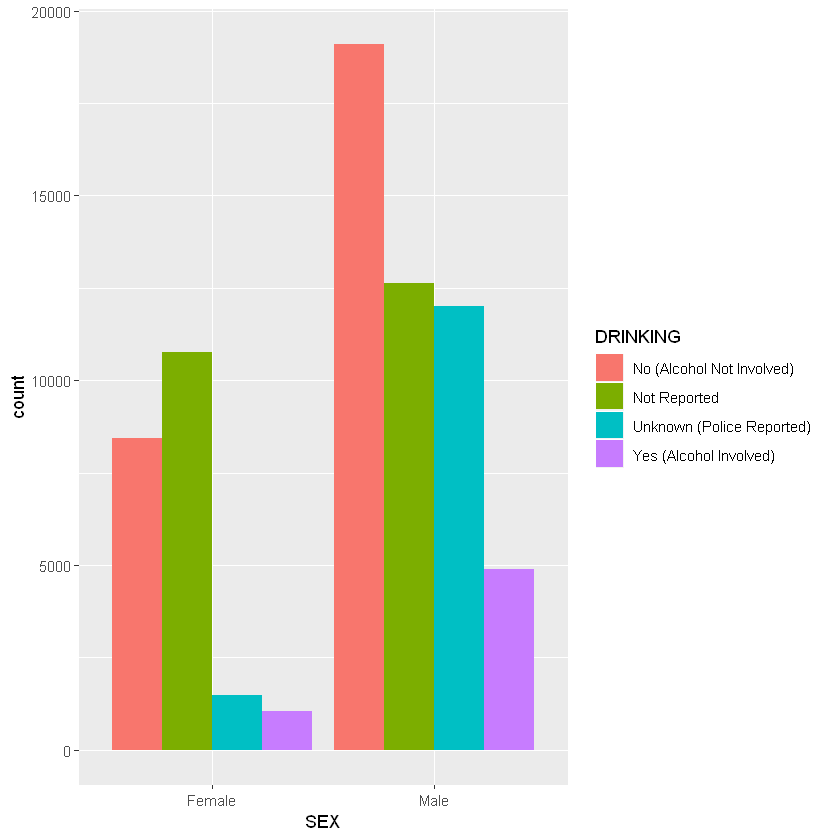

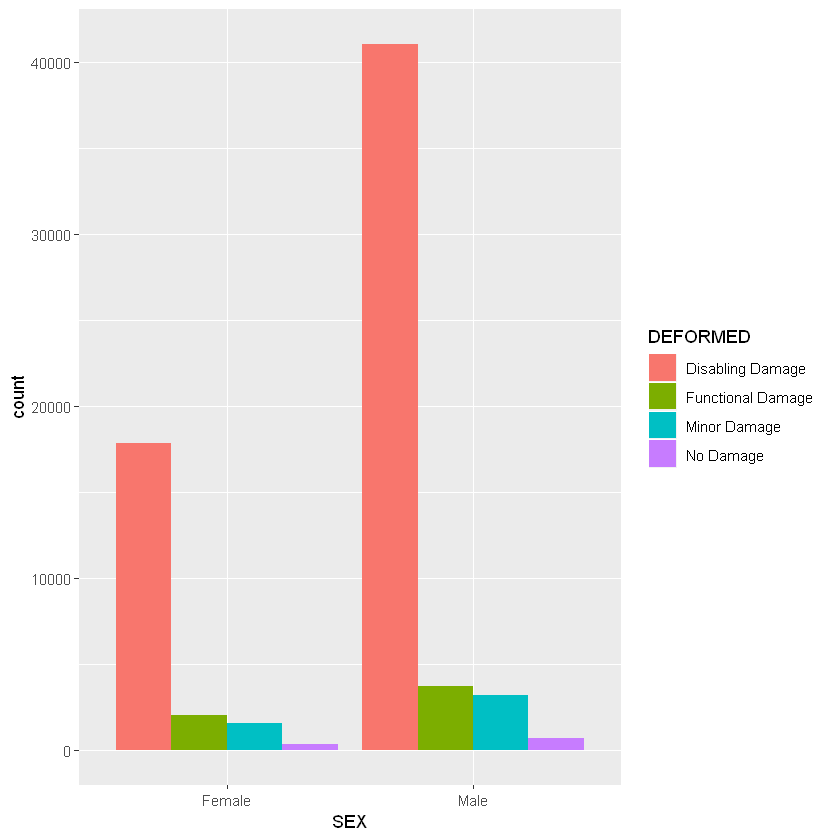

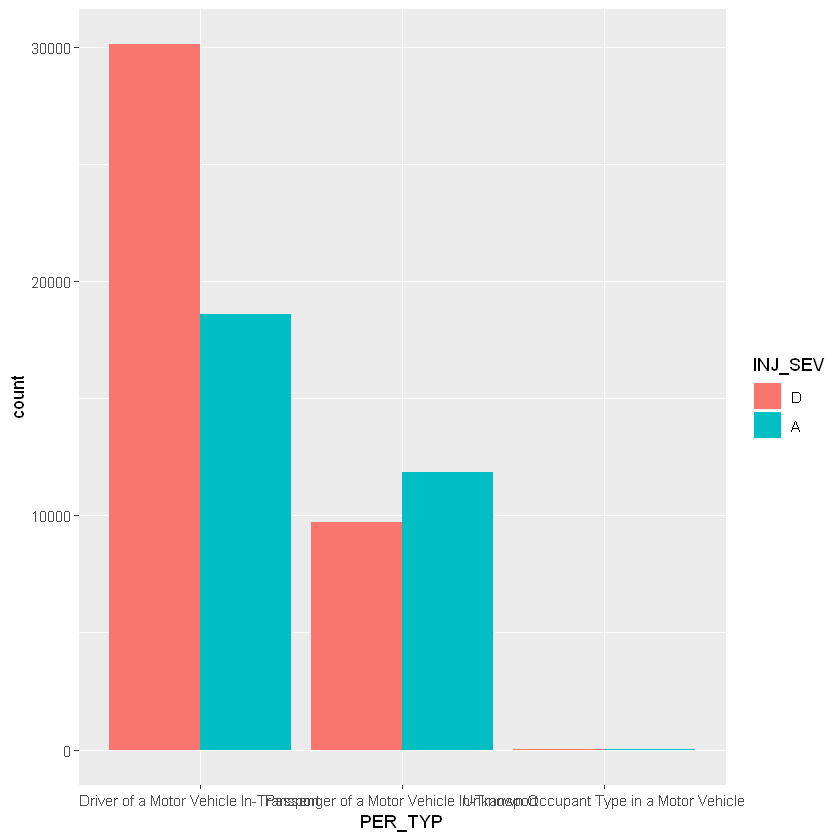

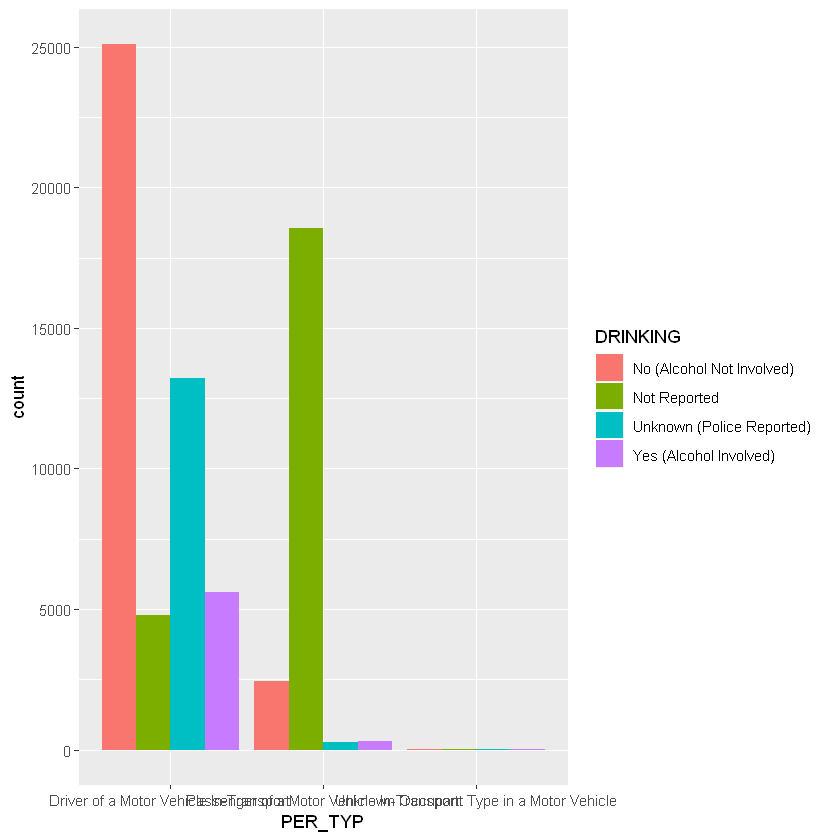

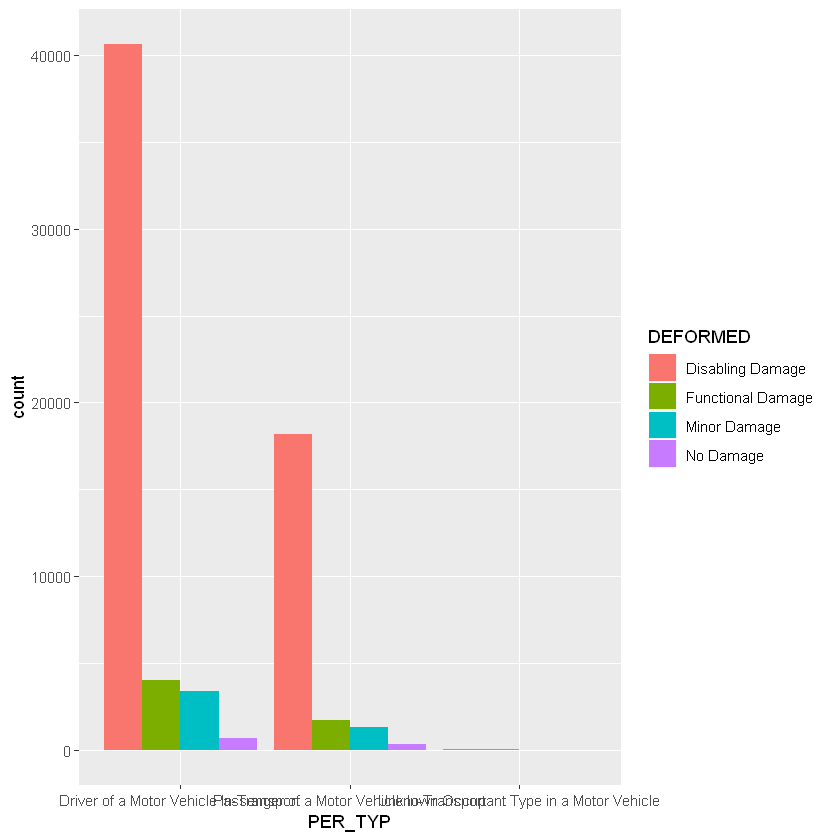

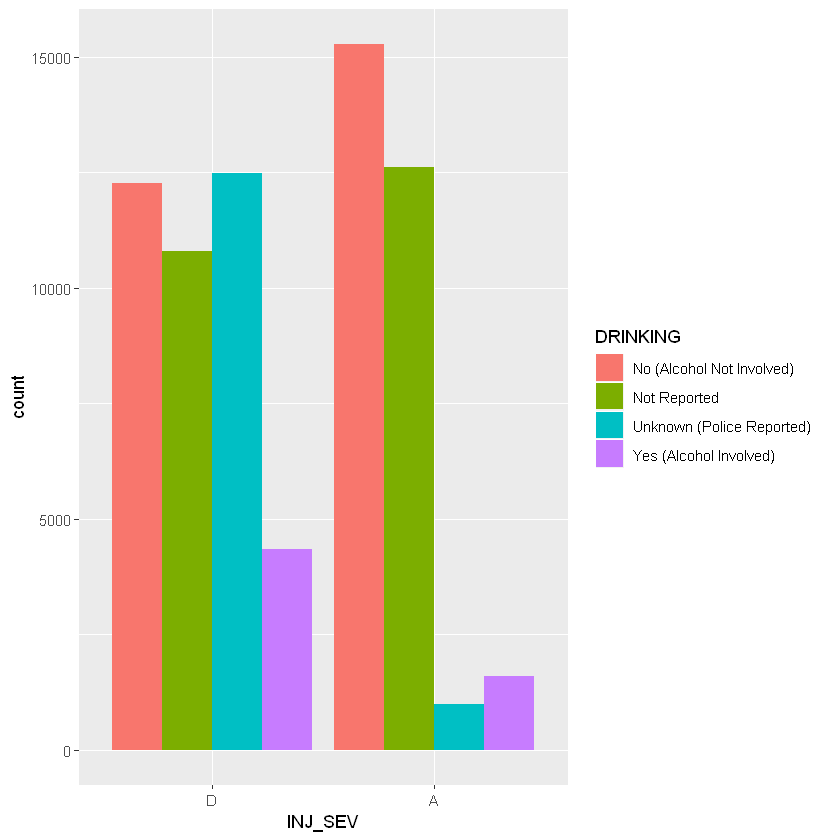

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]


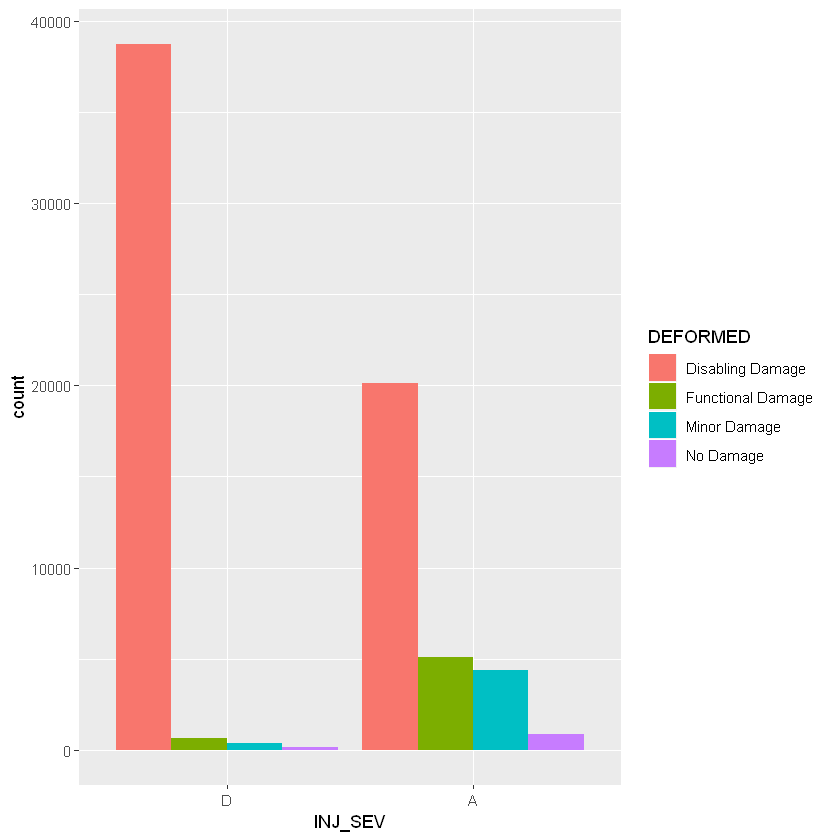

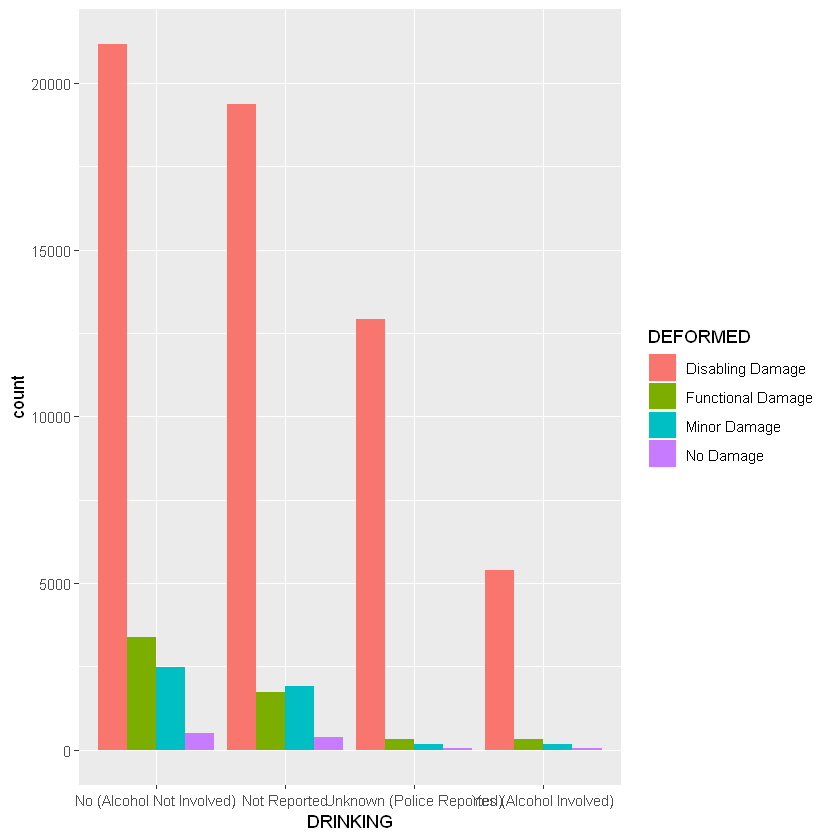

In [9]:
QuickVisual(a17, 1)

## Target Variable Relationships

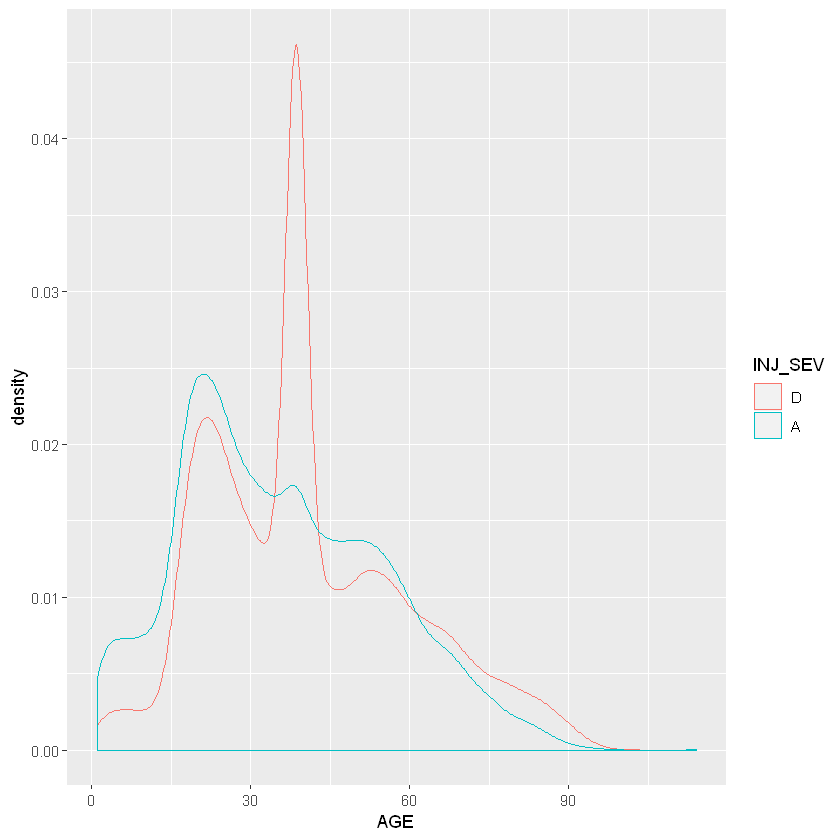

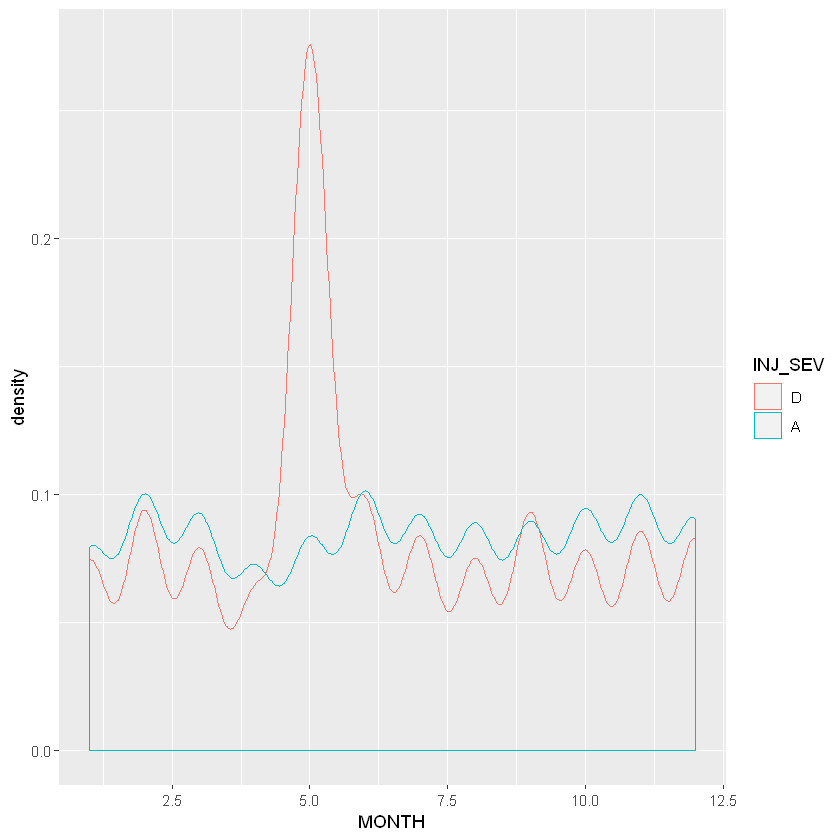

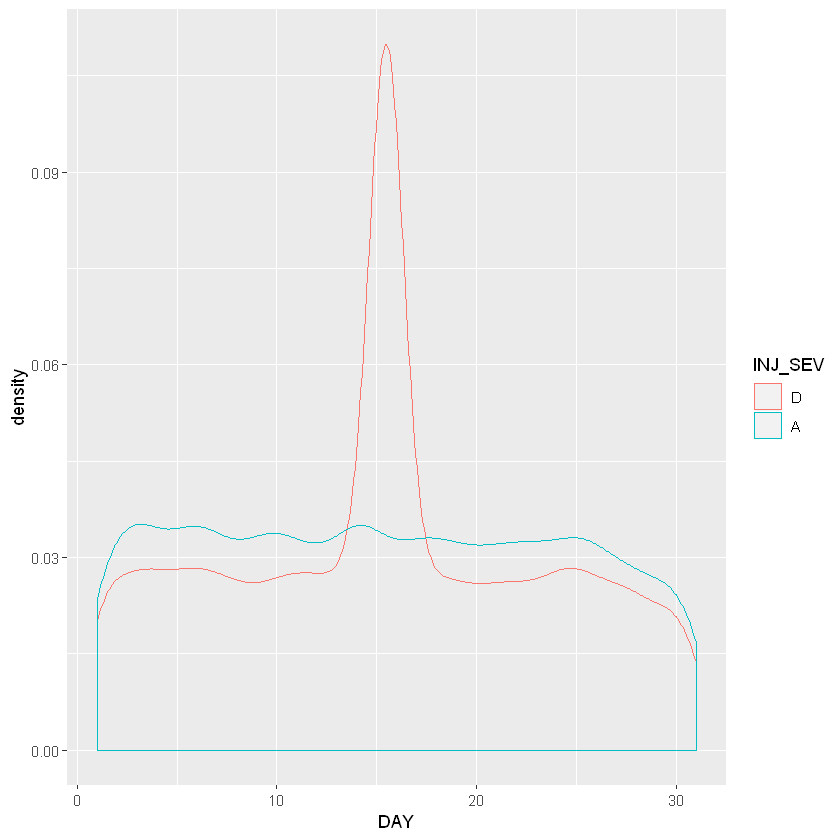

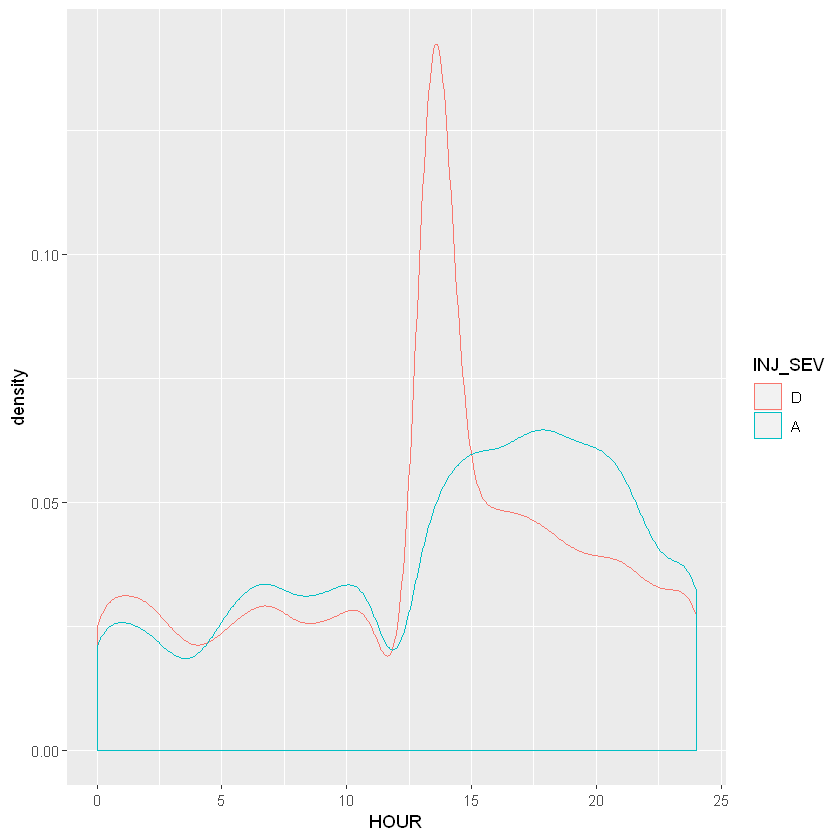

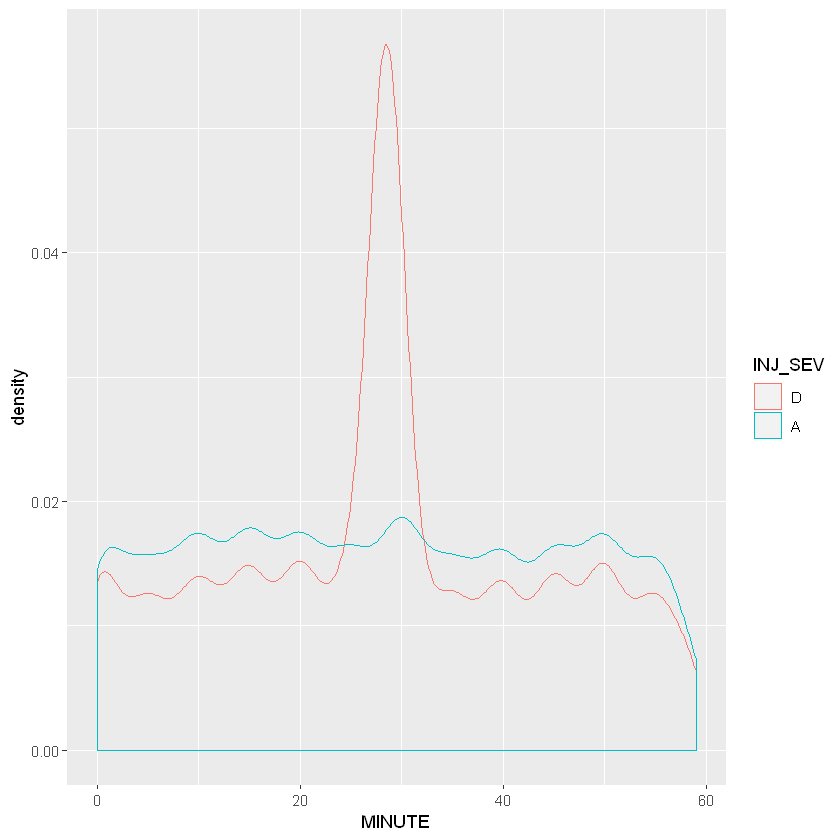

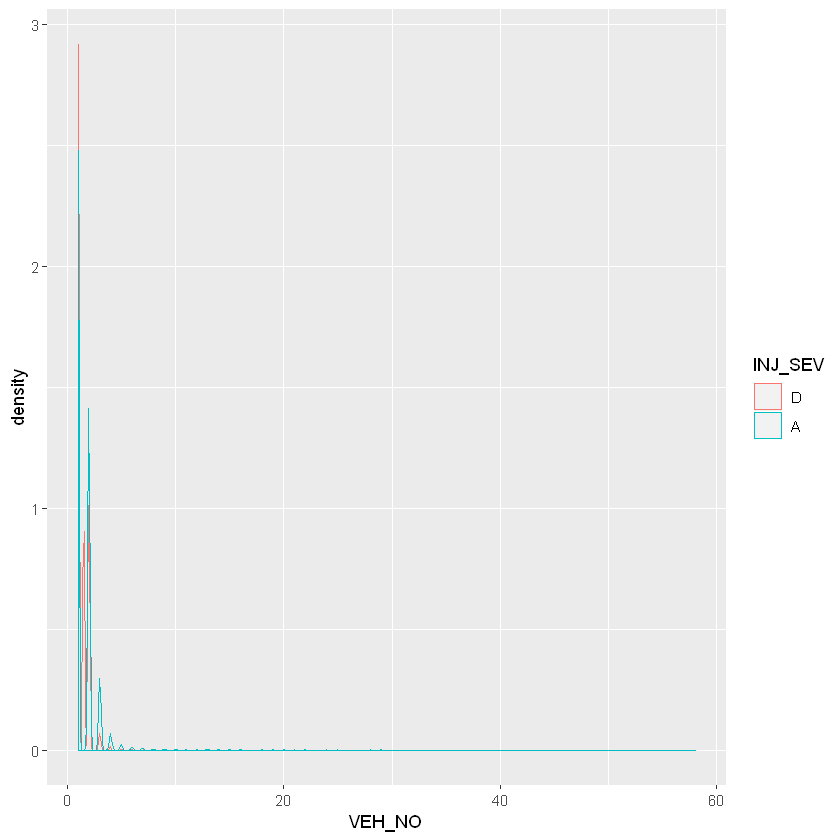

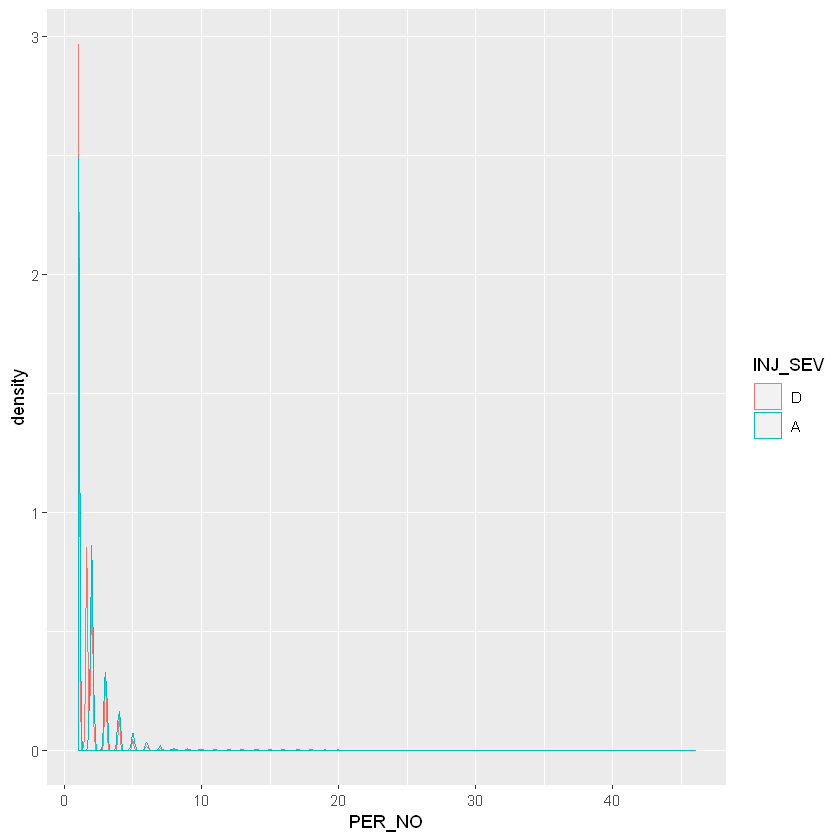

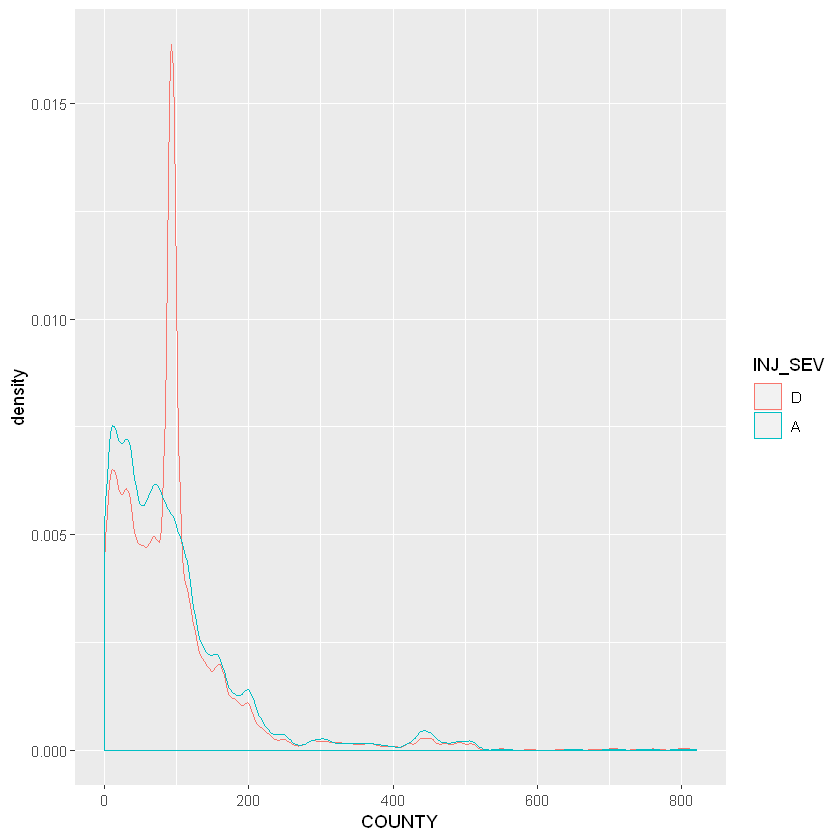

In [10]:
ggplot(a17) + geom_density(mapping = aes(x = AGE, color = INJ_SEV))
ggplot(a17) + geom_density(mapping = aes(x = MONTH, color = INJ_SEV))
ggplot(a17) + geom_density(mapping = aes(x = DAY, color = INJ_SEV))
ggplot(a17) + geom_density(mapping = aes(x = HOUR, color = INJ_SEV))
ggplot(a17) + geom_density(mapping = aes(x = MINUTE, color = INJ_SEV))
ggplot(a17) + geom_density(mapping = aes(x = VEH_NO, color = INJ_SEV))
ggplot(a17) + geom_density(mapping = aes(x = PER_NO, color = INJ_SEV))
ggplot(a17) + geom_density(mapping = aes(x = COUNTY, color = INJ_SEV))

## Quick Predictive Modelling

In [11]:
nc = nrow(a17)
ra = sample(1:nc, 1000)
a17a = a17[ra,]
QuickModel(a17a,12)

[1] 0.6320875

## More Predictive Models

In [12]:
myGrid1 = expand.grid(mtry = 5, splitrule = c("gini", "extratrees"), min.node.size = c(1:5))
model1 = train(INJ_SEV ~ ., a17a, method = "ranger", trControl = trainControl(method = "cv", number = 7), tuneGrid = myGrid1)
max(model1$results$Accuracy)

myGrid2 = expand.grid(mtry = 10, splitrule = c("gini", "extratrees"), min.node.size = c(1:10))
model2 = train(INJ_SEV ~ ., a17a, method = "ranger", trControl = trainControl(method = "cv", number = 7), tuneGrid = myGrid2)
max(model2$results$Accuracy)

myGridglm = expand.grid(alpha = seq(0, 1, length = 5), lambda = seq(0.0001, 0.1, length = 5))
myControl = trainControl(method = "cv", number = 7)
glmtuned = train(INJ_SEV~., a17a, method ="glmnet",tuneGrid = myGridglm, trControl = myControl)
max(glmtuned$results$Accuracy)

myGridglm2 = expand.grid(alpha = seq(0, 1, length = 10) , lambda = seq(0.0001, 0.1, length = 10))
myControl2 = trainControl(method = "cv", number = 7)
glmtuned2 = train(INJ_SEV~., a17a, method ="glmnet",tuneGrid = myGridglm2, trControl = myControl2)
max(glmtuned2$results$Accuracy)

[1] 0.7340049

[1] 0.7311095

[1] 0.7310117

[1] 0.732961